In [1]:
# %matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [18]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [3]:
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
input_nation = pd.read_csv('./Nation/nation_news_nocon_1.csv')
input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_11.csv'),ignore_index=True)
input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_2.csv'),ignore_index=True)
input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_3.csv'),ignore_index=True)
input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_4.csv'),ignore_index=True)
input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_5.csv'),ignore_index=True)
input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_6.csv'),ignore_index=True)
input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_7.csv'),ignore_index=True)
input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_8.csv'),ignore_index=True)

In [5]:
input_nation.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
input_nation['view'] = input_nation['view'].apply(lambda x: int(''.join(x.split(','))))
input_nation['share'] = input_nation['share'].apply(lambda x: int(''.join(x.split(','))))

In [7]:
input_nation.head()

,headline,date,DOW,time,view,like,share,comment,category,tag
0,ไทยส่งทีมเยาวชนลุยศึกเชียร์ลีดดิ้งโลกที่สหรัฐฯ,05/04/2562,FRI,12:15,494,NaN,86,NaN,กีฬา,NaN
1,"""บิ๊กโจ๊ก"" จ่อเรียก ""ปิยบุตร"" ให้ข้อมูล ปมถูกร้อง",05/04/2562,FRI,12:16,1250,NaN,797,NaN,อาชญากรรม,NaN
2,"""ศศิน"" ชี้ ""เปรมชัย"" ต้องติดคุก จึงจะเหมาะสม",05/04/2562,FRI,12:06,755,NaN,354,NaN,คุณภาพชีวิต,NaN
3,จิตอาสาปรับปรุงภูมิทัศน์รอบ แหล่งน้ำศักดิ์สิทธิ์,05/04/2562,FRI,12:02,232,NaN,4,NaN,ภูมิภาค,NaN
4,คุณภาพน้ำ สงกรานต์คูเมืองเชียงใหม่ เกณฑ์พอใช้,05/04/2562,FRI,12:04,298,NaN,36,NaN,คุณภาพชีวิต,NaN


In [8]:
print("number of news : ", len(input_nation))
print("number of category : ", len(input_nation.category.unique()))
print("max view : ", input_nation.view.max())
print("min view : ", input_nation.view.min())
print("max share : ", input_nation.share.max())
print("min share : ", input_nation.share.min())
# print("number of news : ", len(input_nation))

number of news :  5831
number of category :  20
max view :  198827
min view :  0
max share :  143860
min share :  0


In [9]:
input_nation.sort_values(by=['view'], ascending=False)[:20]

,headline,date,DOW,time,view,like,share,comment,category,tag
5445,"คำต่อคำ ""ธนาธร""ประกาศ เอา’ทักษิณ’กลับบ้าน",09/03/2562,SAT,08:40,198827,NaN,143860,NaN,การเมือง,NaN
3480,"ผู้บริหารเนชั่นโต้ ""ธนาธร"" กล่าวหาเนชั่นทีวี",20/03/2562,WED,15:40,141005,NaN,50332,NaN,คุณภาพชีวิต,NaN
5160,ปส.รวบอดีตนางแบบ ผลิตยาลดอ้วนผสมสารเสพติด100ล้าน,11/03/2562,MON,10:38,121035,NaN,26064,NaN,อาชญากรรม,NaN
5785,ศาลฯ ตัดสิน ยุบ! #พรรคไทยรักษาชาติ,07/03/2562,THU,15:30,115874,NaN,73418,NaN,การเมือง,NaN
722,"นร.หญิงชี้ตัวยืนยัน ""เอกไฝ"" บุกสนามสอบหอมแก้ม",26/02/2562,TUE,15:09,115203,NaN,97407,NaN,อาชญากรรม,NaN
2350,เพื่อไทยตั้งรัฐบาลล่ม!! มาไม่ถึง 251,27/03/2562,WED,11:30,112372,NaN,35078,NaN,การเมือง,NaN
4700,"เปิดเอกสารใบสมัคร ""วันทิพย์ หิรัญธนาอังกูร"" พบ...",13/03/2562,WED,15:27,103784,NaN,10926,NaN,การเมือง,NaN
3783,"""เปรมชัย"" คอตก! ศาลสั่งจำคุก คดี #เสือดำ",19/03/2562,TUE,10:30,98144,NaN,60231,NaN,คุณภาพชีวิต,NaN
787,"ลึก-ลึกศึกงานบวช ""วัดสิงห์คอนเนกชั่น"" ""ม่วงศ...",26/02/2562,TUE,10:26,94528,NaN,11667,NaN,เจาะประเด็นร้อน,NaN
5346,"อดีตผู้พิพากษาศาลฎีกา โพสต์ตอบ ""ธนาธร"" ปม ""ทัก...",09/03/2562,SAT,20:15,85833,NaN,26319,NaN,การเมือง,NaN


In [94]:
input_nation.sort_values(by=['view'], ascending=True)[:20]

,headline,date,DOW,time,view,like,share,comment,category,tag
2966,เนชั่นทันข่าว วันที่ 21-3-62 ช่วงที่ 2,23/03/2562,SAT,13:35,0,NaN,0,NaN,การเมือง,NaN
2967,เนชั่นทันข่าว วันที่ 21-3-62 ช่วงที่ 1,23/03/2562,SAT,13:31,0,NaN,0,NaN,การเมือง,NaN
2969,เนชั่นทันข่าว วันที่ 20-3-62 ช่วงที่ 5,23/03/2562,SAT,13:30,0,NaN,0,NaN,การเมือง,NaN
4403,เนชั่นทันข่าว วันที่ 12-3-62 ช่วงที่ 1,14/03/2562,THU,20:29,0,NaN,0,NaN,การเมือง,NaN
4407,เนชั่นทันข่าว วันที่ 11-3-62 ช่วงที่ 2,14/03/2562,THU,20:23,1,NaN,0,NaN,การเมือง,NaN
669,เนชั่นคัดข่าวเช้า วันอังคารที่ 2 เมษายน 2562 ...,02/04/2562,TUE,09:36,1,NaN,0,NaN,เจาะประเด็นร้อน,NaN
670,เนชั่นคัดข่าวเช้า วันอังคารที่ 2 เมษายน 2562 ...,02/04/2562,TUE,09:32,1,NaN,0,NaN,เจาะประเด็นร้อน,NaN
4408,เนชั่นทันข่าว วันที่ 11-3-62 ช่วงที่ 1,14/03/2562,THU,20:21,1,NaN,0,NaN,การเมือง,NaN
3511,เนชั่นทันข่าว วันที่ 15-3-62 ช่วงที่ 1,20/03/2562,WED,13:42,2,NaN,0,NaN,การเมือง,NaN
563,เก็บตกเที่ยงช่วงที่ 2 02-04-62,02/04/2562,TUE,13:56,2,NaN,0,NaN,คุณภาพชีวิต,NaN


In [96]:
# axes = plt.subplots(211,figsize=(20,20))
# ax = sns.distplot(input_nation['view'])

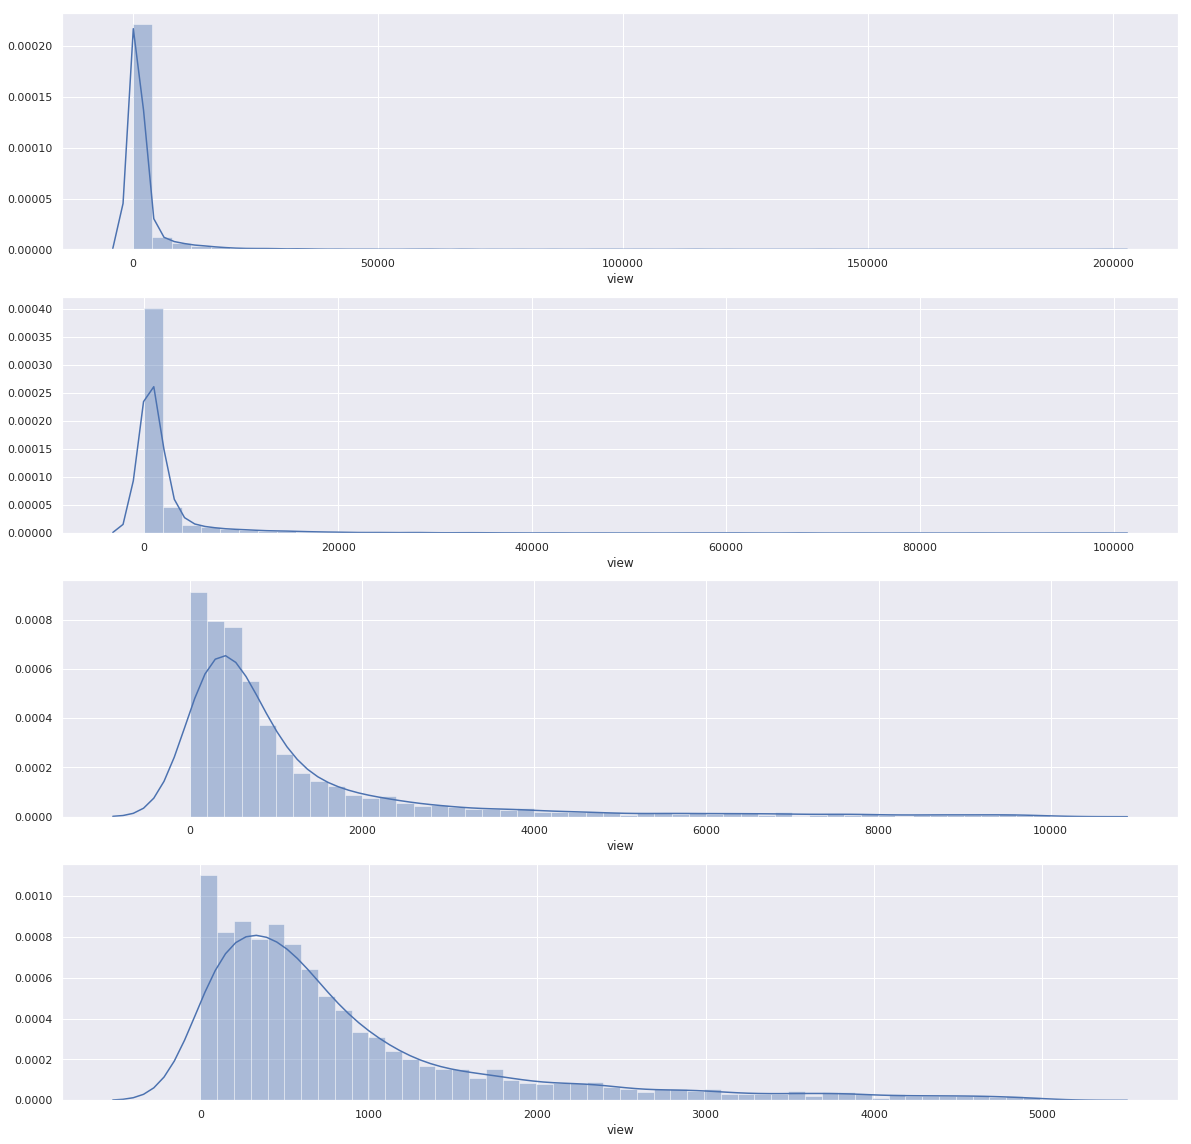

In [67]:
f, axarr = plt.subplots(4, figsize=(20,20))
sns.distplot(input_nation['view'],ax=axarr[0])
sns.distplot(input_nation[input_nation['view']<100000]['view'],ax=axarr[1])
sns.distplot(input_nation[input_nation['view']<10000]['view'],ax=axarr[2])
sns.distplot(input_nation[input_nation['view']<5000]['view'],ax=axarr[3])

In [10]:
input_nation['hour'] = input_nation['time'].str.split(':', expand = True)[0]

In [12]:
IQRval = input_nation['view'].describe().loc['75%']-input_nation['view'].describe().loc['25%']

In [13]:
outlierMin = max(input_nation['view'].describe().loc['25%']-1.5*IQRval,0)
outlierMax = input_nation['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

0 3516.75


In [14]:
input_nation_cut = input_nation[(input_nation['view']<=outlierMax) & (input_nation['view']>=outlierMin)]

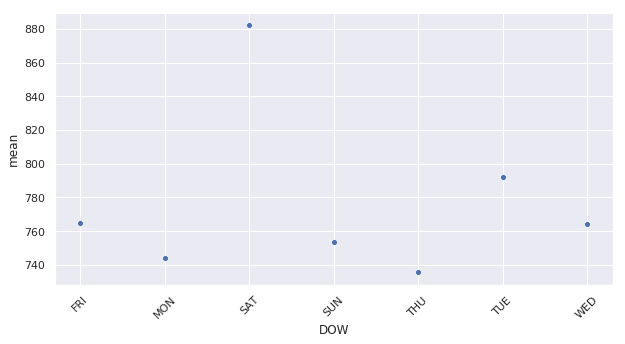

In [15]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="DOW", y="mean", data=pd.DataFrame(input_nation_cut.groupby(['DOW'])['view'].describe()).reset_index())

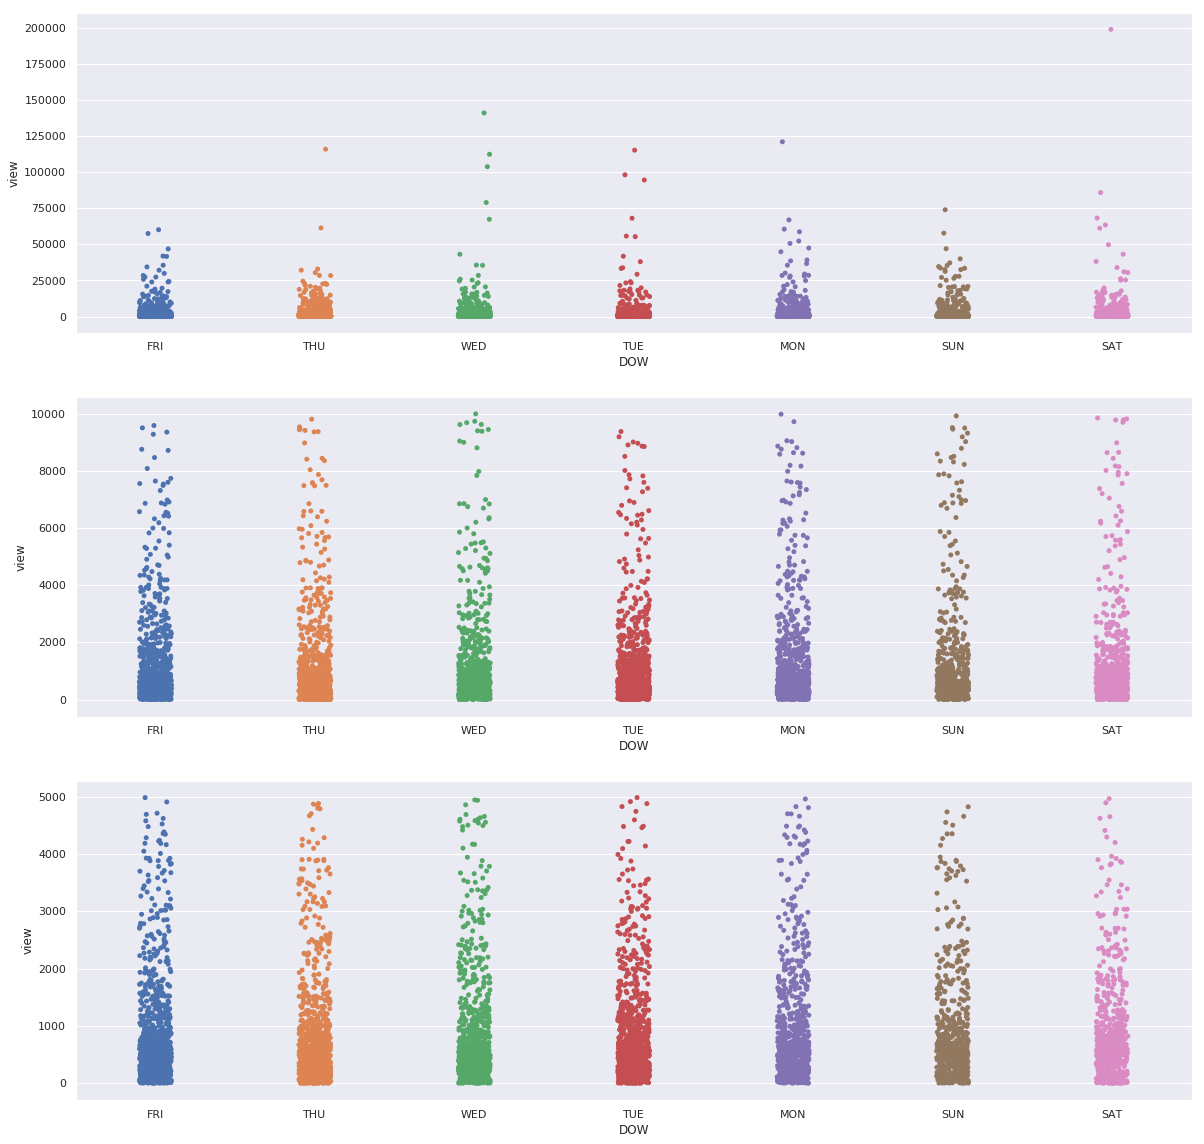

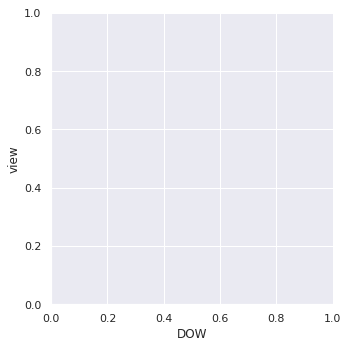

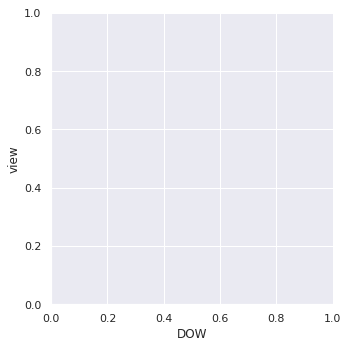

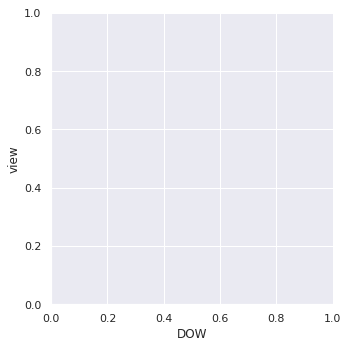

In [73]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(3,figsize=(20,20))
sns.catplot( ax=ax[0], x="DOW", y="view", data=input_nation )
sns.catplot( ax=ax[1], x="DOW", y="view", data=input_nation[input_nation['view']<10000])
sns.catplot( ax=ax[2], x="DOW", y="view", data=input_nation[input_nation['view']<5000])

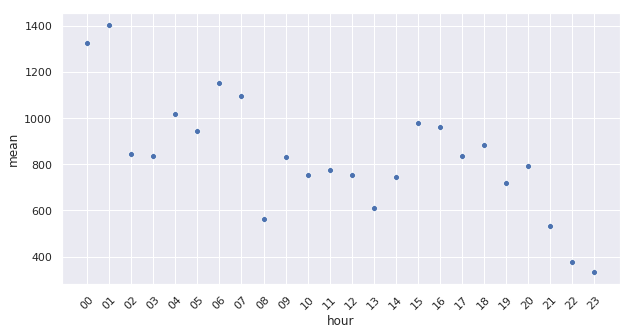

In [16]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="hour", y="mean", data=pd.DataFrame(input_nation_cut.groupby(['hour'])['view'].describe()).reset_index())

In [96]:
input_nation.head()

,headline,date,DOW,time,view,like,share,comment,category,tag,hour
0,ไทยส่งทีมเยาวชนลุยศึกเชียร์ลีดดิ้งโลกที่สหรัฐฯ,05/04/2562,FRI,12:15,494,NaN,86,NaN,กีฬา,NaN,12
1,"""บิ๊กโจ๊ก"" จ่อเรียก ""ปิยบุตร"" ให้ข้อมูล ปมถูกร้อง",05/04/2562,FRI,12:16,1250,NaN,797,NaN,อาชญากรรม,NaN,12
2,"""ศศิน"" ชี้ ""เปรมชัย"" ต้องติดคุก จึงจะเหมาะสม",05/04/2562,FRI,12:06,755,NaN,354,NaN,คุณภาพชีวิต,NaN,12
3,จิตอาสาปรับปรุงภูมิทัศน์รอบ แหล่งน้ำศักดิ์สิทธิ์,05/04/2562,FRI,12:02,232,NaN,4,NaN,ภูมิภาค,NaN,12
4,คุณภาพน้ำ สงกรานต์คูเมืองเชียงใหม่ เกณฑ์พอใช้,05/04/2562,FRI,12:04,298,NaN,36,NaN,คุณภาพชีวิต,NaN,12


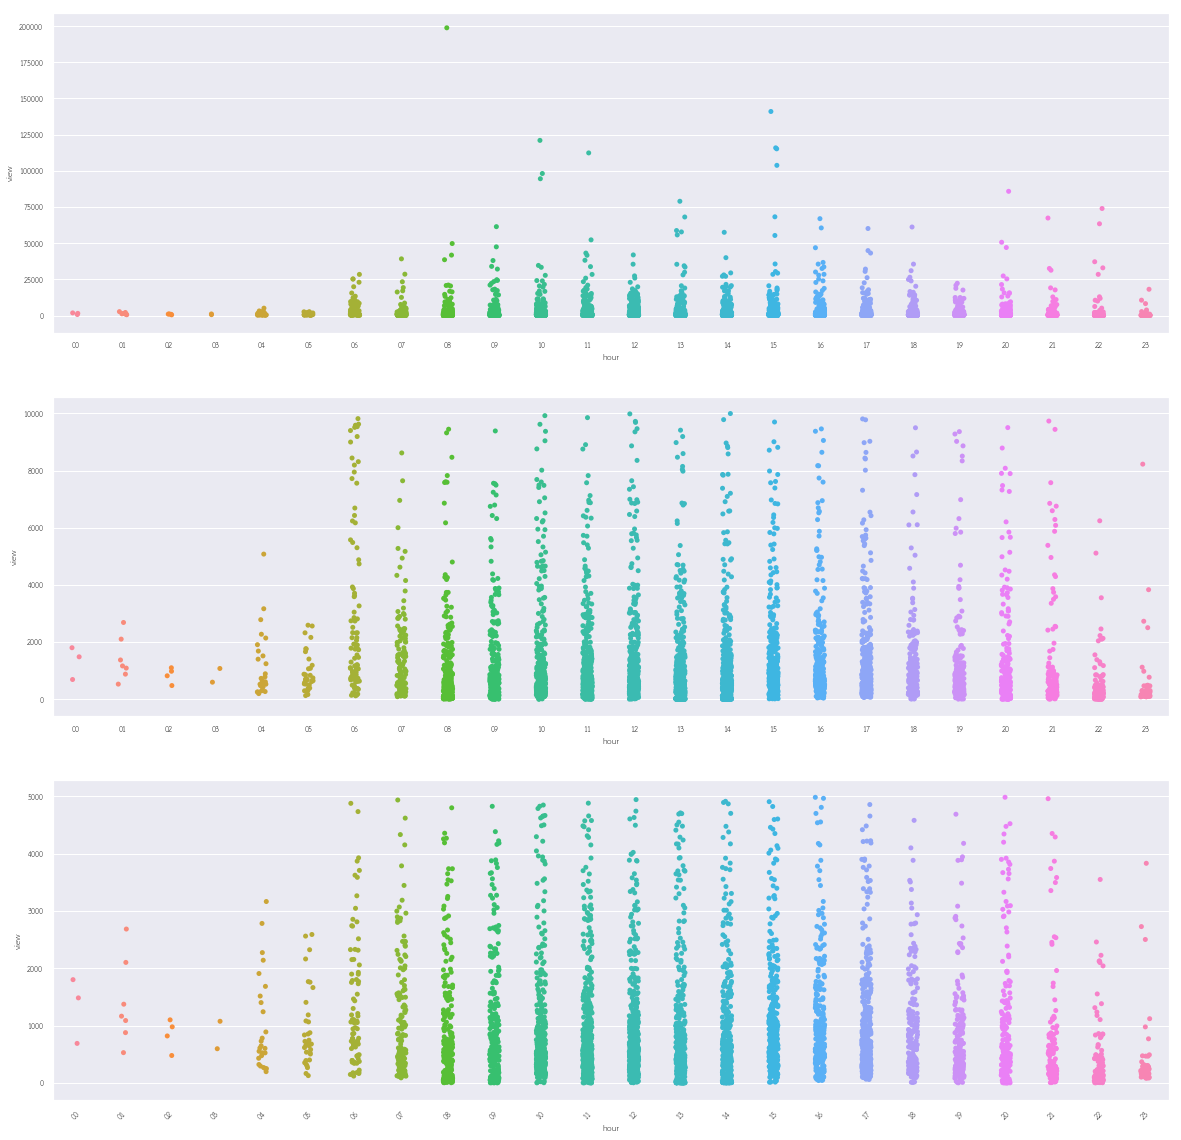

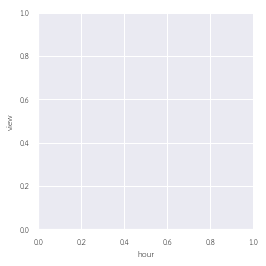

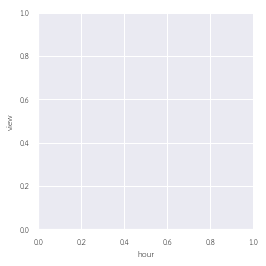

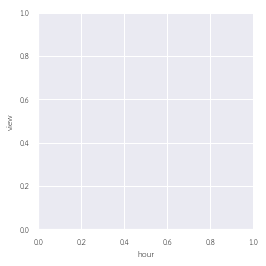

In [77]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(3,1,figsize=(20,20))
plt.xticks(rotation=45)
# sns.catplot( ax =ax[0],x="hour", y="view", data=input_nation )
sns.catplot( ax=ax[0], x="hour", y="view", data=input_nation)
sns.catplot( ax=ax[1], x="hour", y="view", data=input_nation[input_nation['view']<10000])
sns.catplot( ax=ax[2], x="hour", y="view", data=input_nation[input_nation['view']<5000])

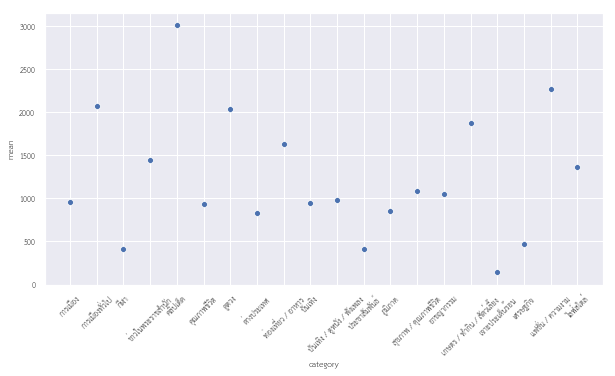

In [19]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="category", y="mean", data=pd.DataFrame(input_nation_cut.groupby(['category'])['view'].describe()).reset_index())

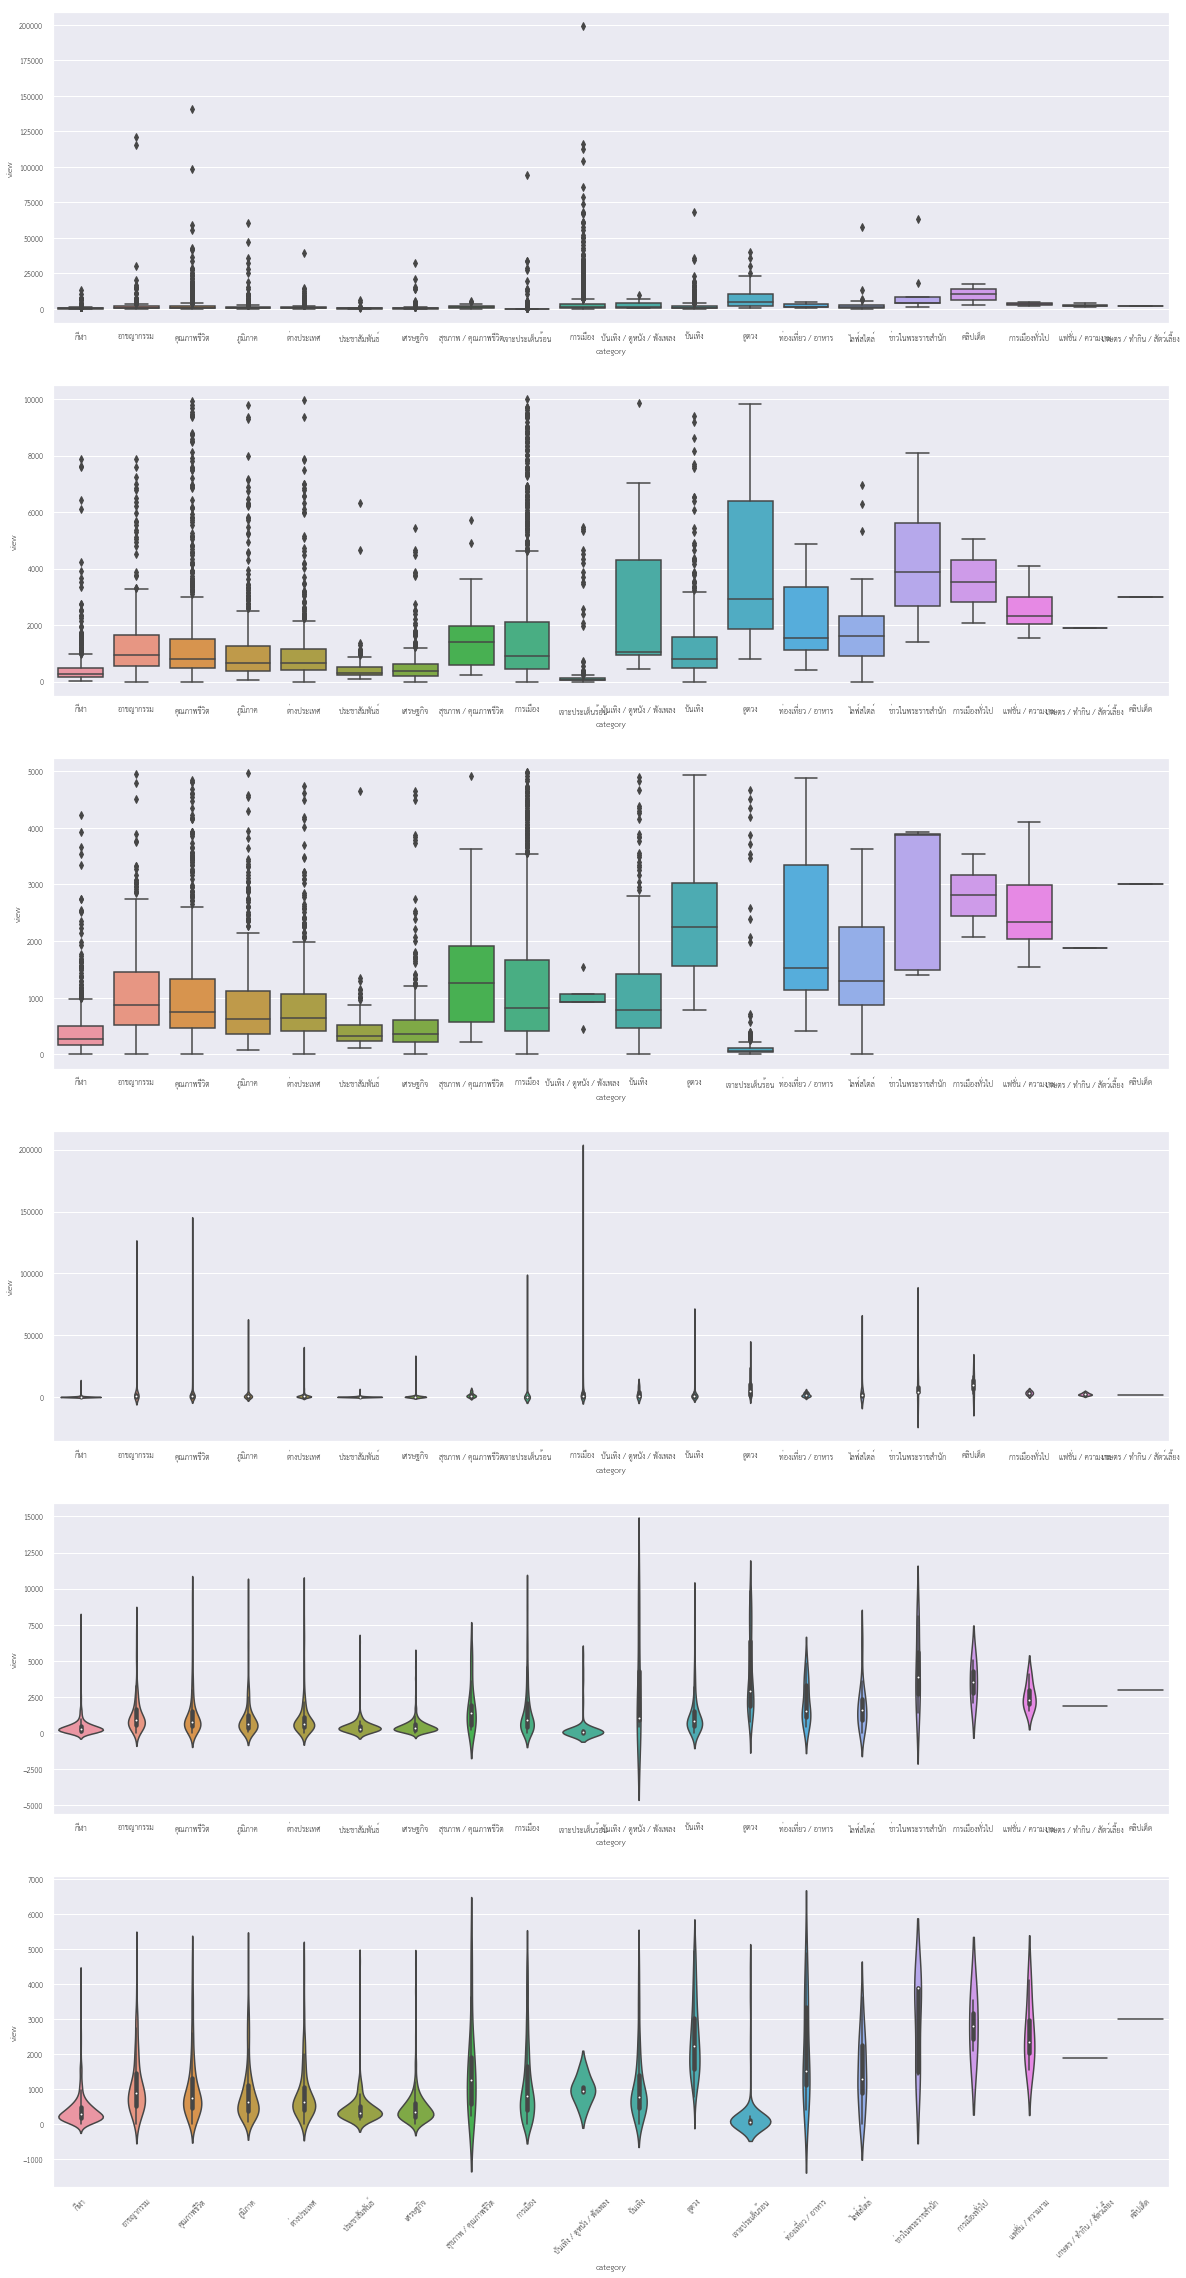

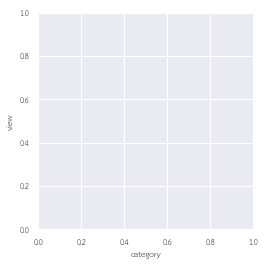

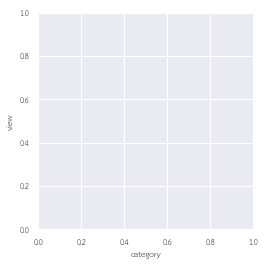

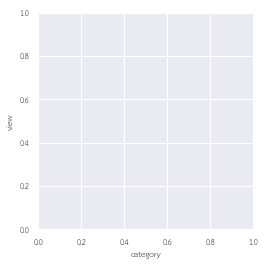

In [78]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(6,1,figsize=(20,40))
plt.xticks(rotation=45)
# sns.catplot( ax =ax[0],x="hour", y="view", data=input_nation )
sns.catplot( ax=ax[0], x="category", y="view",kind="box", data=input_nation)
sns.catplot( ax=ax[1], x="category", y="view",kind="box",data=input_nation[input_nation['view']<10000])
sns.catplot( ax=ax[2], x="category", y="view", kind="box",data=input_nation[input_nation['view']<5000])
sns.violinplot( ax=ax[3], x="category", y="view", data=input_nation)
sns.violinplot( ax=ax[4], x="category", y="view",data=input_nation[input_nation['view']<10000])
sns.violinplot( ax=ax[5], x="category", y="view",data=input_nation[input_nation['view']<5000])

In [82]:
# input_nation['numTag'] = input_nation['tag'].apply( lambda x : len(str(x).split(',')))

In [97]:
input_nation.head()

,headline,date,DOW,time,view,like,share,comment,category,tag,hour
0,ไทยส่งทีมเยาวชนลุยศึกเชียร์ลีดดิ้งโลกที่สหรัฐฯ,05/04/2562,FRI,12:15,494,NaN,86,NaN,กีฬา,NaN,12
1,"""บิ๊กโจ๊ก"" จ่อเรียก ""ปิยบุตร"" ให้ข้อมูล ปมถูกร้อง",05/04/2562,FRI,12:16,1250,NaN,797,NaN,อาชญากรรม,NaN,12
2,"""ศศิน"" ชี้ ""เปรมชัย"" ต้องติดคุก จึงจะเหมาะสม",05/04/2562,FRI,12:06,755,NaN,354,NaN,คุณภาพชีวิต,NaN,12
3,จิตอาสาปรับปรุงภูมิทัศน์รอบ แหล่งน้ำศักดิ์สิทธิ์,05/04/2562,FRI,12:02,232,NaN,4,NaN,ภูมิภาค,NaN,12
4,คุณภาพน้ำ สงกรานต์คูเมืองเชียงใหม่ เกณฑ์พอใช้,05/04/2562,FRI,12:04,298,NaN,36,NaN,คุณภาพชีวิต,NaN,12


In [84]:
# sns.jointplot("numTag", "view", data=input_nation, kind="reg",height=20 )
# sns.jointplot("numTag", "view", data=input_nation[input_nation['view']<100000], kind="reg",height=20 )

In [98]:
input_nation.to_csv('notebook1-result-nation.csv')